Hem treballat amb models regressius per a fer una predicció de quan trigarà a trobar feina una persona a partir de les dades presents al csv df_ins. Per tant el target serà "Temps inserció".

També hem graficat la correlació de les característiques amb la previsió per tal de donar més informació al client envers quins factors poden tenir més influència en el temps que triga la persona a trobar feina

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('df_ins.csv')
df.head()

,ID,Adreça principal - Codi postal,Adreça principal - Població,Data Naixement,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,...,Tipus comunicació al centre,Localitat Centre formació,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data alta,Tipus de relació,Data inici de contracte o col·locació,Temps inserció
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,8950.0,ESPLUGUES DE LLOBREGAT,15/05/1983,Masculí,NIF,Persones Voluntàries,Afectat/da,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,36.0,2022-03-11,Persones Voluntàries,2022-06-28,109 days
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,barcelona,13/05/1970,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,...,NaN,ONLINE,NaN,0.0,3.0,22.0,2022-03-25,Participant Xarxa de Dones,2022-11-17,237 days
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,8415.0,BIGAS I RELL,20/09/1989,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,2019-01-01,Participant SAES,2020-01-07,371 days
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,BARCELONA,07/01/1981,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,2019-01-01,Participant SAES,2020-06-10,526 days
4,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,Barcelona,13/12/1985,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,...,NaN,NaN,NaN,0.0,4.0,77.0,2022-06-09,Participant SAES,2022-10-18,131 days


In [3]:
#escollim les columnes amb informació interessant
df=df[['ID','Adreça principal - Codi postal','Data Naixement','Gènere',"Tipus d'identificació",'Tipus de relacions actuals','Vinculació discapacitat auditiva','Nº persones a unitat familiar','Té certificat CAD',"% Grau Discapacitat",'Temps CAD','On sordesa','Rep ajut econòmic?','Presenta pluridiscapacitat?','Tipus pluridiscapacitat','Pren medicació','Tipus de sordesa','Moment apareix sordesa','Causa pèrdua auditiva','Porta audiòfon?','Porta implant coclear?','On implant coclear','Sistema de comunicació','Nivell formatiu','Data incorporació mercat laboral','Temps total experiència',"Nombre d'experiències",'Quantitat seguiments','Data inici de contracte o col·locació','Data alta','Temps inserció']]
df.head()

,ID,Adreça principal - Codi postal,Data Naixement,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,...,On implant coclear,Sistema de comunicació,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Temps inserció
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,8950.0,15/05/1983,Masculí,NIF,Persones Voluntàries,Afectat/da,3.0,NaN,33.0,...,NaN,Oral,NaN,NaN,NaN,NaN,36.0,2022-06-28,2022-03-11,109 days
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,13/05/1970,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,...,NaN,Oral,Universitat,NaN,0.0,3.0,22.0,2022-11-17,2022-03-25,237 days
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,8415.0,20/09/1989,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,56.0,...,NaN,Bimodal,NaN,NaN,NaN,NaN,8.0,2020-01-07,2019-01-01,371 days
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,07/01/1981,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,...,NaN,Oral,NaN,NaN,NaN,NaN,17.0,2020-06-10,2019-01-01,526 days
4,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,13/12/1985,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,...,NaN,Bimodal,NaN,NaN,0.0,4.0,77.0,2022-10-18,2022-06-09,131 days


In [4]:
import numpy as np

# Convertim la columna Data Naixement a datetime
df['Data Naixement'] = pd.to_datetime(df['Data Naixement'])

# Calculem l'edat i l'afegim al df
fecha_actual = pd.to_datetime('today')
df['Edat'] = ((fecha_actual - df['Data Naixement']) / np.timedelta64(1, 'Y')).astype(int)

# Eliminem la columna Data Naixement
df = df.drop('Data Naixement', axis=1)
df.head()

/tmp/ipykernel_14682/1600609617.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data Naixement'] = pd.to_datetime(df['Data Naixement'])


,ID,Adreça principal - Codi postal,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Temps CAD,...,Sistema de comunicació,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Temps inserció,Edat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,8950.0,Masculí,NIF,Persones Voluntàries,Afectat/da,3.0,NaN,33.0,NaN,...,Oral,NaN,NaN,NaN,NaN,36.0,2022-06-28,2022-03-11,109 days,39
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,NaN,...,Oral,Universitat,NaN,0.0,3.0,22.0,2022-11-17,2022-03-25,237 days,52
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,8415.0,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,56.0,NaN,...,Bimodal,NaN,NaN,NaN,NaN,8.0,2020-01-07,2019-01-01,371 days,33
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,NaN,...,Oral,NaN,NaN,NaN,NaN,17.0,2020-06-10,2019-01-01,526 days,41
4,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,Permanent,...,Bimodal,NaN,NaN,0.0,4.0,77.0,2022-10-18,2022-06-09,131 days,37


In [5]:
#pasar dates a datetimes
df['Data incorporació mercat laboral'] = pd.to_datetime(df['Data incorporació mercat laboral'])
df['Data inici de contracte o col·locació'] = pd.to_datetime(df['Data inici de contracte o col·locació'])
df['Data alta'] = pd.to_datetime(df['Data alta'])


df.head()

,ID,Adreça principal - Codi postal,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Temps CAD,...,Sistema de comunicació,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Temps inserció,Edat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,8950.0,Masculí,NIF,Persones Voluntàries,Afectat/da,3.0,NaN,33.0,NaN,...,Oral,NaN,NaT,NaN,NaN,36.0,2022-06-28,2022-03-11,109 days,39
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,NaN,...,Oral,Universitat,NaT,0.0,3.0,22.0,2022-11-17,2022-03-25,237 days,52
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,8415.0,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,56.0,NaN,...,Bimodal,NaN,NaT,NaN,NaN,8.0,2020-01-07,2019-01-01,371 days,33
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,NaN,...,Oral,NaN,NaT,NaN,NaN,17.0,2020-06-10,2019-01-01,526 days,41
4,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,Permanent,...,Bimodal,NaN,NaT,0.0,4.0,77.0,2022-10-18,2022-06-09,131 days,37


In [6]:
#passem els valors nans a Adreça principal - Codi postal a 0
df['Adreça principal - Codi postal'] = df['Adreça principal - Codi postal'].fillna(0)

In [7]:
#posem 0 davant de Adreça principal - Codi postal en els casos necessaris
df['Adreça principal - Codi postal'] = df['Adreça principal - Codi postal'].astype(int).astype(str).str.zfill(5)
df.head()

,ID,Adreça principal - Codi postal,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Temps CAD,...,Sistema de comunicació,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Temps inserció,Edat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,08950,Masculí,NIF,Persones Voluntàries,Afectat/da,3.0,NaN,33.0,NaN,...,Oral,NaN,NaT,NaN,NaN,36.0,2022-06-28,2022-03-11,109 days,39
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,NaN,...,Oral,Universitat,NaT,0.0,3.0,22.0,2022-11-17,2022-03-25,237 days,52
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,08415,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,56.0,NaN,...,Bimodal,NaN,NaT,NaN,NaN,8.0,2020-01-07,2019-01-01,371 days,33
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,NaN,...,Oral,NaN,NaT,NaN,NaN,17.0,2020-06-10,2019-01-01,526 days,41
4,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,Permanent,...,Bimodal,NaN,NaT,0.0,4.0,77.0,2022-10-18,2022-06-09,131 days,37


In [8]:
df.dtypes

ID                                               object
Adreça principal - Codi postal                   object
Gènere                                           object
Tipus d'identificació                            object
Tipus de relacions actuals                       object
Vinculació discapacitat auditiva                 object
Nº persones a unitat familiar                   float64
Té certificat CAD                                object
% Grau Discapacitat                             float64
Temps CAD                                        object
On sordesa                                       object
Rep ajut econòmic?                               object
Presenta pluridiscapacitat?                      object
Tipus pluridiscapacitat                          object
Pren medicació                                   object
Tipus de sordesa                                 object
Moment apareix sordesa                           object
Causa pèrdua auditiva                           

In [9]:
#dummies
dummy_cols = ['Gènere', "Tipus d'identificació", 'Tipus de relacions actuals','Vinculació discapacitat auditiva','Temps CAD',
'On sordesa','Tipus pluridiscapacitat','Tipus de sordesa','Moment apareix sordesa','Causa pèrdua auditiva','On implant coclear','Sistema de comunicació','Nivell formatiu']
df = pd.get_dummies(df, columns=dummy_cols)
df.head()

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Bimodal,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,08950,3.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1.0,Sí,33.0,No,Sí,No,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,08415,4.0,NaN,56.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,4.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3.0,Sí,34.0,No,No,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [10]:
#passem columnes a int y passem a 0 els nans
df[['Nº persones a unitat familiar', '% Grau Discapacitat', "Nombre d'experiències",'Quantitat seguiments']] = df[['Nº persones a unitat familiar', '% Grau Discapacitat', "Nombre d'experiències",'Quantitat seguiments']].fillna(0).astype(int)
df.head()

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Bimodal,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,08950,3,NaN,33,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1,Sí,33,No,Sí,No,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,08415,4,NaN,56,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,4,NaN,73,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3,Sí,34,No,No,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [11]:
#passem a 0 i 1 les diferents columnes
#passem a 0 els nans entenent que són dades que la persona tècnica no ha introduït ja que el seu valor és 0
df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']] = df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']].replace({'Sí': 1, 'No': 0}).astype(float)

df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']] = df[['Té certificat CAD', 'Rep ajut econòmic?', 'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?', 'Porta implant coclear?']].fillna(0.0).astype(int)

df.head()


,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Bimodal,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,08950,3,0,33,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1,1,33,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,08415,4,0,56,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,4,0,73,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3,1,34,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
#passem Temps inserció a Timedelta
df['Temps inserció'] = pd.to_timedelta(df['Temps inserció'])


In [13]:
#eliminem valors de més de 500 dies a temps d'inserció  ja que valorem que la persona pot haver trobat feina, però no ho ha comunicat
df=df.loc[df['Temps inserció'] < pd.Timedelta(days=500)]

df.head()

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Bimodal,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat
0,91b512ed-90d2-f0b8-a931-5bb4a041b77d,08950,3,0,33,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1,1,33,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,93350bbd-eaed-2146-7bec-5bb4a00a7483,08415,4,0,56,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3,1,34,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,9a90727c-cecc-b902-c583-5bb4a06c1275,08030,4,1,66,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
#observem la quantitat de dades que ens quedem per a fer la predicció
df.shape

(77, 88)

# Machine Learning

In [15]:
#seleccionem les columnes
df=df[['ID', 'Edat',
       'Nº persones a unitat familiar', 'Té certificat CAD',
       '% Grau Discapacitat', 'Rep ajut econòmic?',
       'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?',
       'Porta implant coclear?',
       'Temps total experiència', "Nombre d'experiències",
       'Quantitat seguiments', 'Gènere_Femení',
       'Gènere_Masculí', "Tipus d'identificació_NIE",
       "Tipus d'identificació_NIF",'Vinculació discapacitat auditiva_Afectat/da', 'Temps CAD_Permanent',
       'Temps CAD_Provisional', 'On sordesa_Biilateral',
       'On sordesa_Unilateral OD', 'Tipus pluridiscapacitat_Altres',
       'Tipus pluridiscapacitat_Física',
       'Tipus pluridiscapacitat_Física,Trastorn mental',
       'Tipus pluridiscapacitat_Física,Visual',
       'Tipus pluridiscapacitat_Intel·lectual',
       'Tipus pluridiscapacitat_Trastorn mental',
       'Tipus de sordesa_Conductiva', 'Tipus de sordesa_Mixta',
       'Tipus de sordesa_Neurosensorial',
       'Moment apareix sordesa_Perilocutiva',
       'Moment apareix sordesa_Postlocutiva',
       'Moment apareix sordesa_Prelocutiva', 'Causa pèrdua auditiva_Adquirida',
       'Causa pèrdua auditiva_Desconeguda', 'Causa pèrdua auditiva_Genètica',
       'On implant coclear_Oïda Dreta', 'On implant coclear_Oïda Esquerra',
       'Sistema de comunicació_Bimodal', 'Sistema de comunicació_Oral',
       'Sistema de comunicació_Signes',
       'Nivell formatiu_Altra formació reglada',
       'Nivell formatiu_Batxillerat (i COU)',
       'Nivell formatiu_Educació Primària (i EGB)',
       'Nivell formatiu_Educació Secundària',
       'Nivell formatiu_Formació Professional',
       'Nivell formatiu_Formació no reglada', 'Nivell formatiu_Universitat',
       'Temps inserció']]

In [16]:
#pasar nans a 0 a la columna Temps total experiència
df[['Temps total experiència']] = df[['Temps total experiència']].fillna(0)

In [17]:
#columnes a normalitzar
df_p= df[['Temps total experiència',"Nombre d'experiències",'Quantitat seguiments','Edat','% Grau Discapacitat']]

<Figure size 432x288 with 0 Axes>

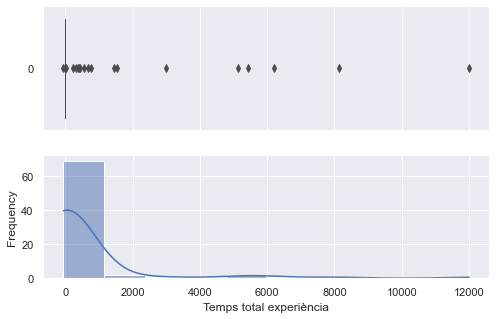

<Figure size 576x360 with 0 Axes>

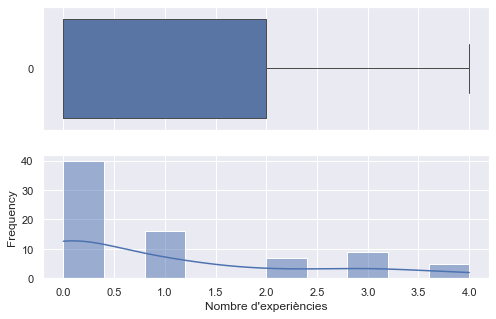

<Figure size 576x360 with 0 Axes>

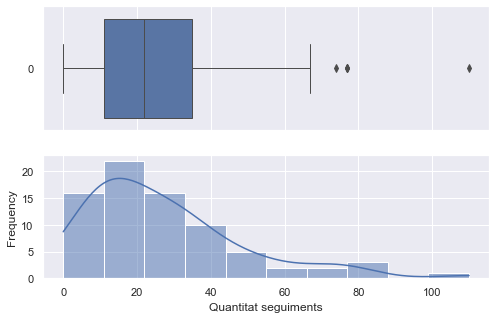

<Figure size 576x360 with 0 Axes>

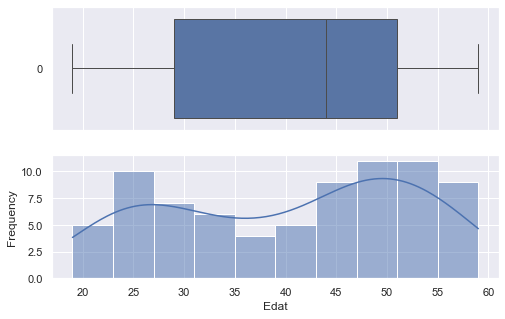

<Figure size 576x360 with 0 Axes>

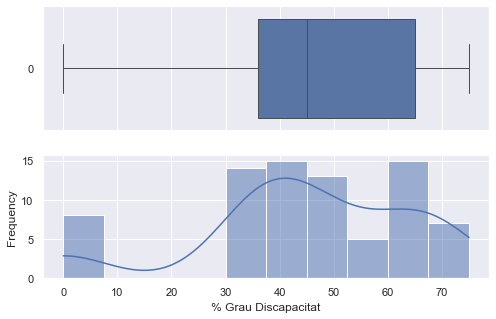

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for i in df_p.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0, orient='h')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [19]:
from scipy import stats


print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df_p.columns:
    shapiro_test = stats.shapiro(df_p[i])
    print('Per la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem refutar la hipòtesis nula\n')
    else:
        print("Podem refutar la hipòtesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  Temps total experiència con un p-value de  1.0832225921168946e-16
Podem refutar la hipòtesis nula

Per la variable  Nombre d'experiències con un p-value de  5.822224369289586e-10
Podem refutar la hipòtesis nula

Per la variable  Quantitat seguiments con un p-value de  1.5070191921040532e-06
Podem refutar la hipòtesis nula

Per la variable  Edat con un p-value de  0.0002537621185183525
Podem refutar la hipòtesis nula

Per la variable  % Grau Discapacitat con un p-value de  8.450329914921895e-06
Podem refutar la hipòtesis nula



In [20]:
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columnsRobust = ["Nombre d'experiències",'Quantitat seguiments','Temps total experiència']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])
columnsMinMax = ["Edat",'% Grau Discapacitat']
scaler = preprocessing.MinMaxScaler().fit(df[columnsMinMax])
df[columnsMinMax] = scaler.transform(df[columnsMinMax])


In [21]:
#convertim ID a index
df.set_index('ID', inplace=True)

In [22]:
df.dtypes

Edat                                                      float64
Nº persones a unitat familiar                               int64
Té certificat CAD                                           int64
% Grau Discapacitat                                       float64
Rep ajut econòmic?                                          int64
Presenta pluridiscapacitat?                                 int64
Pren medicació                                              int64
Porta audiòfon?                                             int64
Porta implant coclear?                                      int64
Temps total experiència                                   float64
Nombre d'experiències                                     float64
Quantitat seguiments                                      float64
Gènere_Femení                                               uint8
Gènere_Masculí                                              uint8
Tipus d'identificació_NIE                                   uint8
Tipus d'id

In [23]:
df.head()

,Edat,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,Temps total experiència,...,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat,Temps inserció
ID,,,,,,,,,,,,,,,,,,,,,
91b512ed-90d2-f0b8-a931-5bb4a041b77d,0.500,3,0,0.440000,0,0,0,0,0,0.0,...,1,0,0,0,0,0,0,0,0,109 days
e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,0.825,1,1,0.440000,0,1,0,0,0,0.0,...,1,0,0,0,0,0,0,0,1,237 days
93350bbd-eaed-2146-7bec-5bb4a00a7483,0.350,4,0,0.746667,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,371 days
1156db83-09ae-9a70-c181-5bb4a0c04248,0.450,3,1,0.453333,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,131 days
9a90727c-cecc-b902-c583-5bb4a06c1275,0.125,4,1,0.880000,1,1,1,0,0,0.0,...,1,0,0,0,0,0,0,0,0,307 days


In [24]:
#primera prova amb diferents models regressius
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# separem les variables independents i la depenent
X = df.drop("Temps inserció", axis=1)
y = df["Temps inserció"]

#passar Temps inserció a int
y = y / np.timedelta64(1, 'D')

# dividir el conjunt de dades en Train i Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# crear una llista de models
models = [
LinearRegression(),
Ridge(),
Lasso(),
ElasticNet(),
DecisionTreeRegressor(),
ExtraTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
AdaBoostRegressor(),
SVR(kernel='linear'),
SVR(kernel='rbf'),
KNeighborsRegressor(),
MLPRegressor(),
GaussianProcessRegressor()
]

# entrenar i evaluar cada model de la llista
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("R2: ", r2_score(y_test, y_pred))
    print()

LinearRegression
RMSE:  144.1549300946706
MAE:  128.5308834024224
R2:  -0.40855282091408096

Ridge
RMSE:  139.66761635676318
MAE:  130.1145078778724
R2:  -0.32222565860970587

Lasso
RMSE:  133.62593210157868
MAE:  122.93663146556469
R2:  -0.21030724580811544

ElasticNet
RMSE:  130.18459383933123
MAE:  111.65827175792406
R2:  -0.14877062825315823

DecisionTreeRegressor
RMSE:  148.87354813173943
MAE:  129.16666666666666
R2:  -0.5022742260500204

ExtraTreeRegressor
RMSE:  224.64471950170562
MAE:  189.75
R2:  -2.42063367662073

RandomForestRegressor
RMSE:  135.78617375614252
MAE:  109.55499999999999
R2:  -0.24975602616948578

GradientBoostingRegressor
RMSE:  143.5970635279019
MAE:  115.61192240499624
R2:  -0.3976719711476786

AdaBoostRegressor
RMSE:  129.1457573222239
MAE:  96.65139757319264
R2:  -0.13051004295381907

SVR
RMSE:  125.96726383273574
MAE:  104.02317450820294
R2:  -0.07554733900765864

SVR
RMSE:  122.98200337740018
MAE:  102.08333579414169
R2:  -0.025173248473854715

KNeighbor

In [25]:
#fem crossvalidation amb els millors resultats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# separem les variables independents i la depenent
X = df.drop("Temps inserció", axis=1)
y = df["Temps inserció"]

#passar Temps inserció a int
y = y / np.timedelta64(1, 'D')

# dividir el conjunt de dades en Train i Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# crear una llista de models
models = [ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(),
          SVR(kernel='linear'), SVR(kernel='rbf'), KNeighborsRegressor()]

# entrenar i evaluar cada model de la llista
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(type(model).__name__)
    print("RMSE (5-fold CV): ", rmse_scores.mean())
    print("MAE (5-fold CV): ", mae_scores.mean())
    print("R2 (5-fold CV): ", r2_scores.mean())
    print()


ElasticNet
RMSE (5-fold CV):  120.83733787869895
MAE (5-fold CV):  105.14132342107796
R2 (5-fold CV):  -0.27959979328523465

RandomForestRegressor
RMSE (5-fold CV):  130.58429681757784
MAE (5-fold CV):  109.23426666666667
R2 (5-fold CV):  -0.5224259976931821

AdaBoostRegressor
RMSE (5-fold CV):  135.5701621162906
MAE (5-fold CV):  111.13440307956925
R2 (5-fold CV):  -0.7949264563493121

SVR
RMSE (5-fold CV):  124.22761715003317
MAE (5-fold CV):  108.13576716610139
R2 (5-fold CV):  -0.3610855810729402

SVR
RMSE (5-fold CV):  118.78654796696682
MAE (5-fold CV):  101.27947942339968
R2 (5-fold CV):  -0.22600723859843508

KNeighborsRegressor
RMSE (5-fold CV):  134.1001899801919
MAE (5-fold CV):  115.57549999999999
R2 (5-fold CV):  -0.6974365373904607



A partir dels resultats podem extreure que el model que s'adapta millor és SVR amb un marge d'error de 101 dies.
Cal donar una importància relativa a les dades, ja que disposem de poques dades, per la qual cosa aquest correlació tindrà variacions importants a partir de l'entrada de noves dades.

In [26]:
#fem un llistat amb la correlació entre característiques i target
corr_matrix = X_train.corrwith(y_train).sort_values(ascending=False)

In [27]:
#creem un df amb tots els valors absoluts majors a 0.20
df_corr = pd.DataFrame(corr_matrix)
df_corr = df_corr.reset_index()
df_corr = df_corr.rename(columns={0: 'Valor'})
df_corr = df_corr.rename(columns={'index': 'Factor'})
df_corr.dropna()
df_corr_np = df_corr[(df_corr['Valor'] > 0.20) | (df_corr['Valor'] < -0.20)]
df_corr_np

,Factor,Valor
0,Tipus d'identificació_NIF,0.212433
1,Nivell formatiu_Formació Professional,0.200384
40,Nivell formatiu_Altra formació reglada,-0.201465
41,Tipus d'identificació_NIE,-0.212433
42,Nivell formatiu_Universitat,-0.223525
43,Causa pèrdua auditiva_Desconeguda,-0.246664
44,Sistema de comunicació_Oral,-0.267242


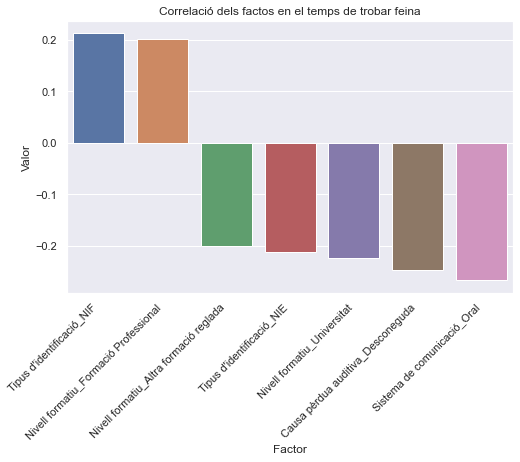

In [28]:
#grafiquem el resultat
import seaborn as sns

# Crear gràfic de barres
plt.title ('Correlació dels factos en el temps de trobar feina')
ax=sns.barplot(x='Factor', y='Valor', data=df_corr_np)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()



Com podem veure que el fet que la persona es comuniqui oralment i que tingui una formació universitària seran dos dels factors més importants per a que el temps per a trobar feina sigui menor.
Per altra banda la formació professional i que la persona tingui NIF seran factors que propiciaran un augment en el temps a trobar feina.
Cal donar una importància relativa a les dades, ja que disposem de poques dades, per la qual cosa aquest correlació tindrà variacions importants a partir de l'entrada de noves dades.